In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
total_df = pd.read_csv("../data/race/total.csv")
total_df.head()

,Race,Population,Poverty,Percent
0,American Indian and/or Alaska Native,332414.0,67071.0,20.2
1,Asian,8332688.0,958856.0,11.5
2,Black or African American,4345881.0,930198.0,21.4
3,Hispanic,24422713.0,5101384.0,20.9
4,Mixed Race,1735304.0,228389.0,13.2


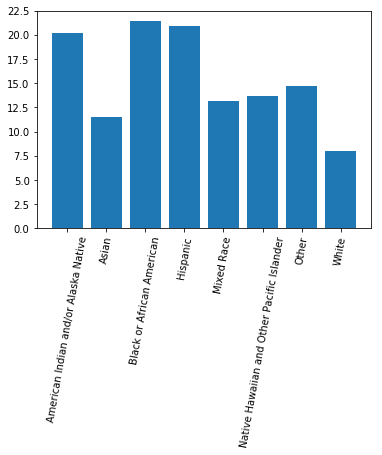

In [3]:
plt.bar(total_df['Race'], total_df['Percent'])
plt.xticks(rotation=80)
plt.savefig('../images/bar.png')
plt.show()

In [4]:
type_df = pd.read_csv("../data/race/type.csv")
type_df.head()

,Race,Type,Population,Poverty,Percent
0,American Indian and/or Alaska Native,Child,83267.0,20949.0,25.2
1,American Indian and/or Alaska Native,Concentrated,67071.0,0.0,0.0
2,American Indian and/or Alaska Native,Overall,332414.0,67071.0,20.2
3,Asian,Child,1821434.0,247008.0,13.6
4,Asian,Concentrated,958856.0,44655.0,4.7


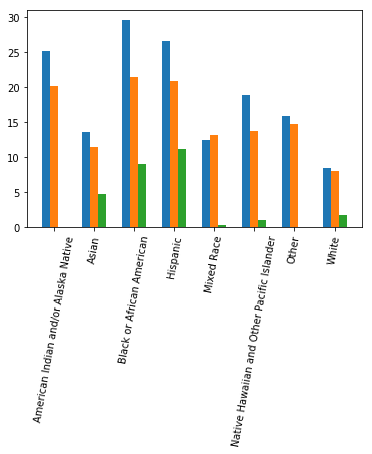

<Figure size 432x288 with 0 Axes>

In [6]:
traces = ['Child', 'Overall', 'Concentrated']
x_cats = total_df['Race'].values.tolist()
x_values = np.arange(len(x_cats))

for i in range(len(traces)):
    plt.bar(x_values + .2*(i-1), type_df.loc[type_df['Type'] == traces[i]]['Percent'], width=.2)
    plt.xticks(x_values, x_cats, rotation=80)
plt.show()
plt.savefig('../images/byType.png')

In [7]:
sorted_df = total_df.sort_values('Poverty')
sorted_df

,Race,Population,Poverty,Percent
6,Other,180865.0,26570.0,14.7
5,Native Hawaiian and Other Pacific Islander,235241.0,32310.0,13.7
0,American Indian and/or Alaska Native,332414.0,67071.0,20.2
4,Mixed Race,1735304.0,228389.0,13.2
2,Black or African American,4345881.0,930198.0,21.4
1,Asian,8332688.0,958856.0,11.5
7,White,30923832.0,2487594.0,8.0
3,Hispanic,24422713.0,5101384.0,20.9


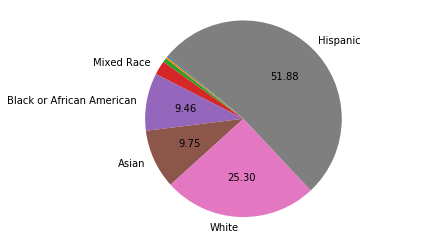

<Figure size 432x288 with 0 Axes>

In [11]:
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 3 else ''

plt.pie(sorted_df['Poverty'], labels=['', '', ''] + sorted_df['Race'][3:].tolist(), 
        autopct=my_autopct, startangle=140)
plt.axis('equal')
plt.show()
plt.savefig('../images/pie.png')